## Octave code to simulate linear Kalman filter for simple example
This code simulates the example introduced in lesson 3.3.3 and is a straightforward implementation of the six Kalman-filter steps on a simple model. You will use this code to answer the practice-quiz questions for this lesson. Feel free to add your own statements to plot or output variables computed by the filter to help you understand better how it works.

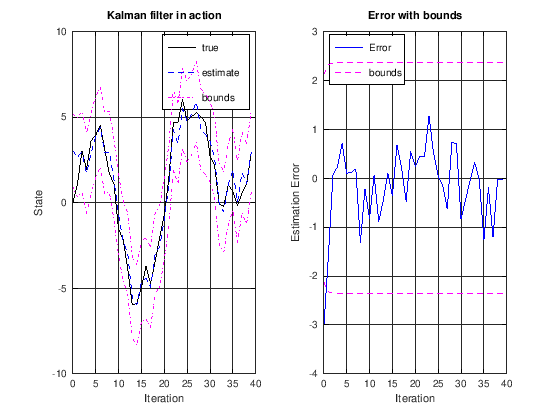

In [23]:
% Initialize simulation variables
SigmaW = 1; % Process noise covariance
SigmaV = 1; % Sensor noise covariance
A = 1; B = 1; C = 1; D = 0; % Plant definition matrices
maxIter = 40;

% Seed the random number generator: Octave's "randn" function produces pseudo 
% random numbers having a Gaussian distribution. To get the same random numbers
% every time you run the code, you can "seed" the pseudo random number generator 
% with a deterministic value. This allows us to get reproducible results that 
% still contain apparent randomness.
%
% YOU MUST NOT CHANGE THE FOLLOWING LINE IN ORDER TO ARRIVE AT "CORRECT" ANSWERS 
% FOR THE QUIZ. IF YOU CHANGE IT TO EXPLORE THE BEHAVIOR OF THE FILTER FOR 
% DIFFERENT PSEUDO-RANDOM SEQUENCES, CHANGE IT BACK TO randn("seed",10) BEFORE 
% COMPUTING RESULTS TO ENTER AS QUIZ RESPONSES.
randn("seed",10)

% Initialize true state, state estimate, error covariance, initial input
xtrue = 0;  % Initialize true system initial state
xhat = 5;   % Initialize Kalman filter initial estimate
SigmaX = 0; % Initialize Kalman filter covariance
u = 0;      % Unknown initial driving input: assume zero

% Reserve storage for variables we might want to plot/evaluate
xstore = zeros(maxIter+1,length(xtrue)); xstore(1,:) = xtrue;
xhatstore = zeros(maxIter,length(xhat));
SigmaXstore = zeros(maxIter,length(xhat)^2);

for k = 1:maxIter,
  % KF Step 1: State estimate time update
  xhat = A*xhat + B*u; % use prior value of "u"

  % KF Step 2: Error covariance time update
  SigmaX = A*SigmaX*A' + SigmaW;

  % [Implied operation of system in background, with
  % input signal u, and output signal z]
  u = 0.5*randn(1) + cos(k/pi); % for example... usually measured
  w = chol(SigmaW)'*randn(length(xtrue));
  v = chol(SigmaV)'*randn(length(C*xtrue));
  ztrue = C*xtrue + D*u + v;  % y is based on present x and u
  xtrue = A*xtrue + B*u + w;  % future x is based on present u

  % KF Step 3: Estimate system output
  zhat = C*xhat + D*u;

  % KF Step 4: Compute Kalman gain matrix
  L = SigmaX*C'/(C*SigmaX*C' + SigmaV);

  % KF Step 5: State estimate measurement update
  xhat = xhat + L*(ztrue - zhat);

  % KF Step 6: Error covariance measurement update
  SigmaX = SigmaX - L*C*SigmaX;

  % [Store information for evaluation/plotting purposes]
  xstore(k+1,:) = xtrue;
  xhatstore(k,:) = xhat;
  SigmaXstore(k,:) = SigmaX(:);
end;

subplot(1,2,1);
plot(0:maxIter-1,xstore(1:maxIter),'k-',0:maxIter-1,xhatstore,'b--', ...
  0:maxIter-1,xhatstore+3*sqrt(SigmaXstore),'m-.',...
  0:maxIter-1,xhatstore-3*sqrt(SigmaXstore),'m-.'); grid;
legend('true','estimate','bounds');
title('Kalman filter in action');
xlabel('Iteration'); ylabel('State');

subplot(1,2,2)
estErr = xstore(1:maxIter)-xhatstore;
plot(0:maxIter-1,estErr,'b-',0:maxIter-1, ...
  3*sqrt(SigmaXstore),'m--',0:maxIter-1,-3*sqrt(SigmaXstore),'m--');
grid; legend('Error','bounds',0);
title('Error with bounds');
xlabel('Iteration'); ylabel('Estimation Error');

In [11]:
# RMS
sqrt((sum(estErr .^ 2))/40)

ans =  0.59538


In [22]:
#  What is the steady-state 3σ error bound on the estimate

sqrt(SigmaXstore(40)) * 3

ans =  2.3585


In [25]:
# RMS 2 - XHAT = 5
sqrt((sum(estErr .^ 2))/40)

ans =  0.79087


In [38]:
Sigma = -1
[U,S,V] = svd(Sigma)
H = V*S*V.'
Sigma = Sigma  + Sigma.'
Sigma = Sigma + H + H.'
Sigma = Sigma / 4

Sigma = -1
U =  1
S =  1
V = -1
H =  1
Sigma = -2
Sigma = 0
Sigma = 0


In [2]:
yk = [0.5;-0.2]
eyk = [2, 0.1; 0.1, 2]

yk =

   0.50000
  -0.20000

eyk =

   2.00000   0.10000
   0.10000   2.00000



In [4]:
X2U = chi2inv(1-0.02,1)

X2U =  5.4119


In [5]:
transpose(yk) * inverse(eyk) * yk

ans =  0.15038
